In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\final\news_with_finbert_sentiment.csv')

In [2]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))

Unique sentiment values BEFORE mapping: ['positive' 'neutral' 'negative']
Unique sentiment values AFTER mapping: [ 1  0 -1]


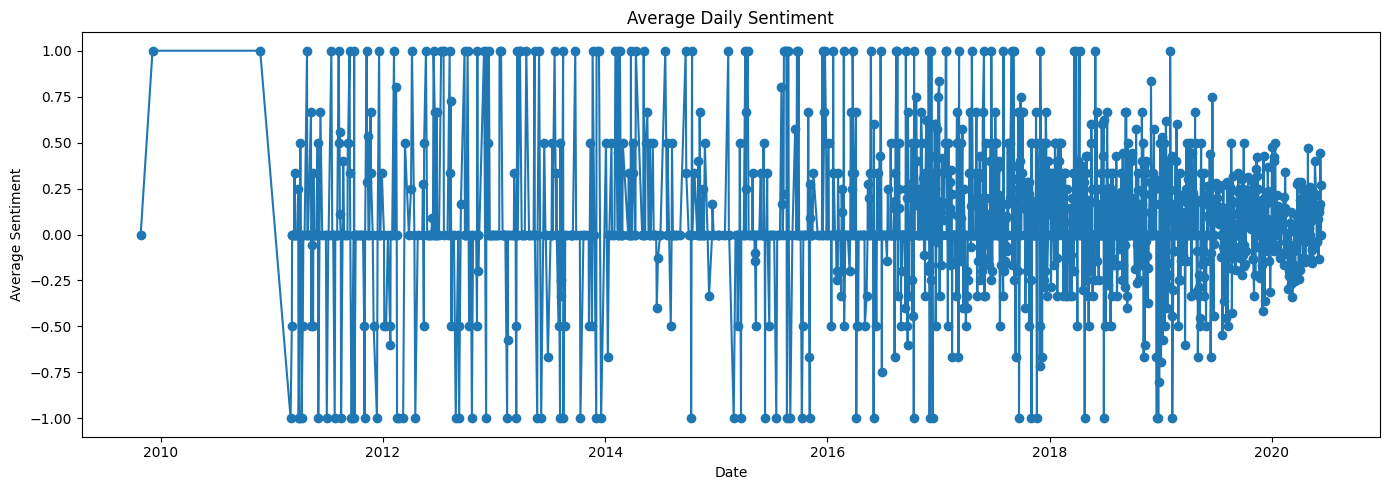

,date,finbert_sentiment
0,2009-10-26,0.000000
1,2009-12-04,1.000000
2,2010-11-23,1.000000
3,2011-03-03,-1.000000
4,2011-03-07,-0.500000
...,...,...
1512,2020-06-05,0.142857
1513,2020-06-08,0.166667
1514,2020-06-09,0.444444
1515,2020-06-10,0.268293


In [3]:
from src.sentiment_analysis import plot_daily_sentiment

plot_daily_sentiment(df)     

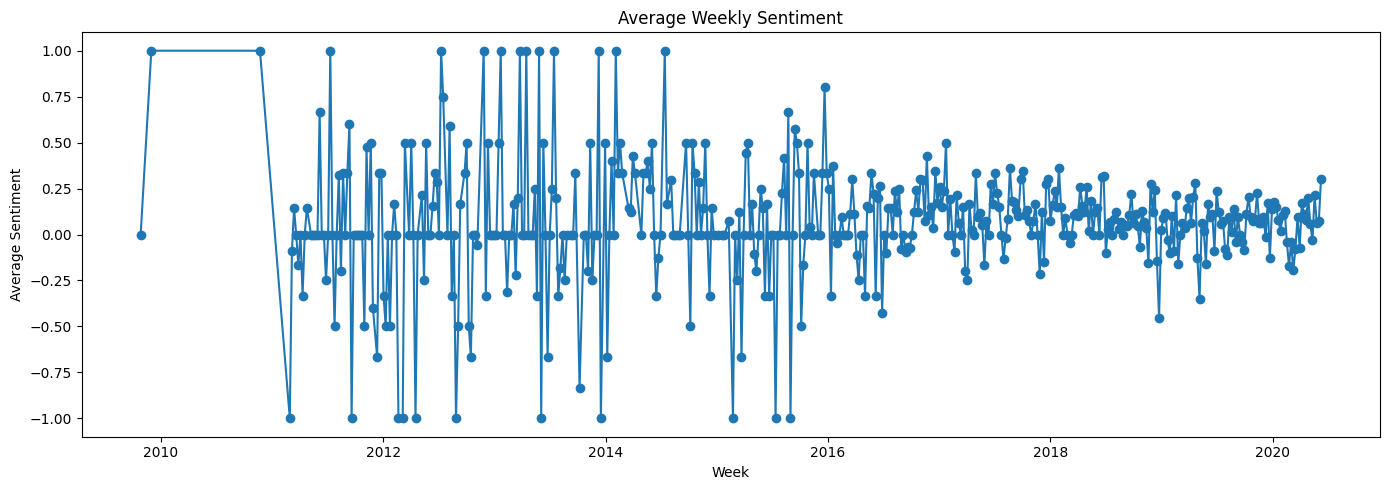

,period,finbert_sentiment
0,2009-10-26/2009-11-01,0.000000
1,2009-11-30/2009-12-06,1.000000
2,2010-11-22/2010-11-28,1.000000
3,2011-02-28/2011-03-06,-1.000000
4,2011-03-07/2011-03-13,-0.090909
...,...,...
457,2020-05-11/2020-05-17,-0.031621
458,2020-05-18/2020-05-24,0.212598
459,2020-05-25/2020-05-31,0.064677
460,2020-06-01/2020-06-07,0.073394


In [4]:
from src.sentiment_analysis import plot_weekly_sentiment

plot_weekly_sentiment(df)  

In [5]:
from src.sentiment_analysis import analyze_news_volatility
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Run the modularized analysis
analysis_df = analyze_news_volatility(df)

100%|██████████| 10/10 [00:30<00:00,  3.05s/it]


In [6]:
import plotly.express as px

for stock in analysis_df['stock'].unique():
    stock_df = analysis_df[analysis_df['stock'] == stock]
    fig = px.box(
        stock_df, 
        x="sentiment", 
        y="volatility_%", 
        points="all", 
        title=f"Volatility vs Sentiment for {stock}",
        labels={"volatility_%": "Volatility (%)", "sentiment": "News Sentiment"}
    )
    fig.show()


**What Is Volatality**

Volatility in the stock market refers to the rate at which the price of a stock changes over a specific period. It essentially measures how much the price fluctuates up and down, indicating the level of risk and potential reward involved. High volatility means significant price swings, while low volatility implies more stable prices. 

In [7]:
from src.sentiment_analysis import plot_stock_and_sentiment_merged
#plot_stock_and_sentiment_merged(df, stock_col='stock', date_col='date', sentiment_col='finbert_sentiment')



In [8]:
from src.sentiment_analysis import StockAnalyzer

analyzer = StockAnalyzer('AAPL', df)
analyzer.plot_candlestick_with_sma_volume_sentiment()


In [16]:
analyzer = StockAnalyzer('GOOGL', df)
analyzer.plot_candlestick_with_sma_volume_sentiment()

# GOOGL Sentiment & Price Analysis (2018–2020)

## 1. Downtrend and Negative Sentiment (2018)
- In the second half of 2018, GOOGL price entered a downtrend, with the stock mostly trading below both the SMA 20 (blue) and SMA 50 (red).
- Sentiment scores (orange, bottom plot) frequently dipped below zero, reflecting persistent negative news flow and investor concerns.
- Volume remained steady, confirming genuine selling pressure.

## 2. Recovery and Sentiment Improvement (Early 2019)
- In early 2019, the price rebounded, rising above the SMAs. Sentiment scores started oscillating above zero, signaling renewed optimism.
- The strongest rallies occurred when sentiment trended positive for multiple days, and price moved above both SMAs—confirming a bullish regime change.

## 3. Volatility and Sentiment Swings (2019–Early 2020)
- Throughout 2019 and early 2020, GOOGL experienced periods of volatility. Sentiment fluctuated between positive and negative, sometimes anticipating choppy or sideways markets.
- Avoid trading during periods where sentiment is unclear or rapidly alternating.

## 4. COVID-19 Crash and Sentiment Collapse (March 2020)
- In March 2020, a sharp price crash occurred, with GOOGL price breaking below both SMAs. The sentiment score plunged into deep negative territory, confirming panic selling and extreme market fear.
- This period exemplifies how negative sentiment spikes can foreshadow or accompany sharp price drops.

## 5. Rapid Recovery with Positive Sentiment (April–June 2020)
- Following the crash, price recovered rapidly, moving above the SMAs by late April.
- Sentiment scores returned to positive and mostly stayed above zero, providing early signals of recovery.
- The combination of rising price, positive sentiment, and increasing volume (middle plot, purple bars) produced a powerful rally, with price reaching new highs by June.

---

## Investment Takeaways

- **Buy or Hold:** Enter or hold when price is above both SMAs *and* sentiment is consistently positive.
- **Caution/Exit:** Tighten stops or exit when sentiment turns sharply negative—especially after an extended rally.
- **Wait:** Stay on the sidelines during periods of mixed or flat sentiment, as price action is likely to be choppy.
- **Volume Confirmation:** Prefer setups where rising price and sentiment are confirmed by higher trading volume.

**Summary:**  
GOOGL’s chart shows that the most sustainable rallies are supported by persistent positive sentiment, price strength above SMAs, and volume. Negative sentiment spikes reliably warn of corrections, while mixed sentiment should keep traders cautious.


In [9]:
from src.sentiment_analysis import StockAnalyzer

analyzer = StockAnalyzer('TSLA', df)
analyzer.plot_candlestick_with_sma_volume_sentiment()

# 📈 Investment Recommendations Using News Sentiment & Stock Data

---

## 1. Leverage Positive Sentiment for Entry Signals
- **Observation:**  
  When the average daily sentiment (bottom plot, orange line) trends consistently above zero, and the price is above both SMA 20 and SMA 50, TSLA often enters a sustained rally.

- **Strategy:**  
  Consider buying (or holding) when the sentiment score moves sharply positive for several consecutive days, especially if the price is also crossing above the SMAs. These moments typically signal increasing market optimism—often leading to momentum-driven gains.

- **Example:**  
  In late 2019 and Jan 2020, TSLA price surged after a series of positive sentiment days, supported by increasing volume.

---

## 2. Beware of Negative or Diverging Sentiment for Exit or Caution
- **Observation:**  
  Sharp drops in sentiment (downward orange spikes) often precede or coincide with price corrections, especially when the stock price is extended above its moving averages.

- **Strategy:**  
  Consider taking profits or tightening stop-loss orders if news sentiment turns negative or diverges from the price trend (e.g., price is rising but sentiment slumps). This can signal underlying concerns or profit-taking, often preceding pullbacks.

- **Example:**  
  Early March 2020 shows negative sentiment and a price drop before the COVID crash.

---

## 3. Monitor Sentiment Surges for Short-Term Trades
- **Observation:**  
  Sudden, large changes in sentiment (either direction) are often followed by increased price volatility and higher trading volumes.

- **Strategy:**  
  Short-term traders can look for spikes in sentiment (positive or negative) as setups for quick trades—buy on positive spikes if price confirms, or consider shorting/hedging on negative spikes if technicals align.

---

## 4. Use Sentiment + Volume as Confirmation
- **Observation:**  
  The most powerful moves occur when sentiment and volume rise together, confirming the market’s reaction to news.

- **Strategy:**  
  Use volume as a secondary confirmation. Enter trades only when both sentiment and trading volume increase, filtering out “false positives” from low-impact news.

---

## 5. SMA Crossovers with Sentiment Filter
- **Observation:**  
  Crossovers between SMA 20 and SMA 50 often signal new trends.

- **Strategy:**  
  Only act on SMA crossovers when they are supported by positive (for golden cross) or negative (for death cross) sentiment trends. This reduces the risk of “fakeouts.”

---

## 6. Avoid Trading on Ambiguous or Neutral Sentiment
- **Observation:**  
  When sentiment hovers near zero or fluctuates rapidly between positive/negative, price action is often choppy or range-bound.

- **Strategy:**  
  Avoid new trades during periods of flat or mixed sentiment—wait for clear, consistent news signals before acting.


In [10]:

analyzer = StockAnalyzer('NFLX', df)
analyzer.plot_candlestick_with_sma_volume_sentiment()

# NFLX Sentiment & Price Analysis (2016–2020)

## 1. Sustained Uptrend with Sentiment Confirmation
- **2016 to mid-2018:** NFLX shows a strong uptrend, with prices frequently staying above both the SMA 20 (blue) and SMA 50 (red).
- **Average daily sentiment** (orange line, bottom plot) is often positive or oscillating above zero, confirming strong market optimism and supporting the price rally.

## 2. Corrections Aligned with Negative Sentiment
- **Major corrections** (e.g., late 2018, mid-2019) often coincide with sharp dips in sentiment (large negative orange spikes).
- These negative sentiment spikes usually precede or accompany price drops, signaling growing market concern or bad news events.

## 3. Choppy Sentiment During Range-Bound Markets
- When sentiment hovers around zero or alternates rapidly between positive/negative, price action becomes choppy or range-bound (especially late 2019).
- **Trading signals** are less reliable in these periods; avoid new positions when sentiment is ambiguous.

## 4. Rallies After Positive Sentiment Surges
- Noticeable price rallies often **follow runs of positive sentiment** (persistent orange spikes above zero).
- When sentiment and price trend up together, and volume increases, these periods yield the strongest gains.

## 5. Volume Confirms Moves
- The most powerful trends (up or down) show both price and sentiment moving together, confirmed by higher trading volumes (middle plot, purple bars).

---

## Takeaways for Investors

- **Buy or Hold:** When daily sentiment is consistently positive and the price is above SMAs, consider buying or holding.
- **Caution/Exit:** When sentiment turns sharply negative—especially if the price is extended above SMAs—consider profit-taking or tighter stops.
- **Wait:** Avoid new trades when sentiment is flat or rapidly fluctuating.
- **Use Volume:** Always look for volume confirmation alongside sentiment and price moves.


In [11]:

analyzer = StockAnalyzer('AMZN', df)
analyzer.plot_candlestick_with_sma_volume_sentiment()

# AMZN Sentiment & Price Analysis (there is only several week data of newsline)

## 1. Gradual Price Rise with Positive Sentiment
- Throughout the period, AMZN’s price generally trends upward, especially in the last several days.
- **SMA 20** (blue line) shows a steady rise, and price moves above it, signaling increasing strength.
- The **average daily sentiment score** (orange line, bottom plot) mostly stays above zero, supporting the uptrend and suggesting consistent market optimism.

## 2. Surges in Price and Sentiment Alignment
- The largest price surge (final days on the plot) is matched by a noticeable jump in sentiment to strong positive values.
- This alignment between price breakout and positive news sentiment is a classic sign of market enthusiasm and often signals momentum-driven buying.

## 3. Volume Confirmation
- The volume bars (middle plot, purple) rise during price surges, confirming that the move is supported by active trading and not just thin market activity.
- Volume confirmation adds reliability to both the price move and sentiment shift.

## 4. Small Negative Spikes: Short-lived
- Occasional drops in sentiment (orange dips) appear, but they’re quickly reversed and do not result in major price corrections—suggesting that negative news was either minor or quickly outweighed by bullish news.

---

## Investment Takeaways

- **Entry Signals:** Consider buying (or holding) when daily sentiment is positive for multiple days and price is trending above SMA 20—especially when confirmed by rising volume.
- **Ride the Trend:** Continue holding as long as both price and sentiment remain positive and SMA 20 is sloping upward.
- **Caution:** Watch for sharp negative sentiment spikes with falling price—these could precede corrections, but in this period, such signals were short-lived.
- **Confirmation:** For stronger signals, always confirm with both volume and sentiment; avoid acting on price moves alone.

**Summary:**  
In this recent period, bullish sentiment and technical signals aligned for AMZN, supporting the price rally. Use positive sentiment as a signal for trend-following entries and rising volume for confirmation. Remain cautious on sentiment drops but prioritize signals when all three indicators align.


In [13]:

analyzer = StockAnalyzer('FXI', df)
analyzer.plot_candlestick_with_sma_volume_sentiment()

# FXI Sentiment & Price Analysis (Feb–June 2020)

## 1. Sharp Selloff, Sentiment Collapse, and Recovery
- In late February and early March 2020, FXI experienced a sharp price decline, falling from around 38 to below 31.
- The daily sentiment score (orange line) also plunged into negative territory, confirming market pessimism and widespread fear—likely due to the initial COVID-19 shock.
- This period shows that strong negative sentiment often aligns with and amplifies sharp price drops.

## 2. Bottoming Out and Early Signs of Reversal
- After the mid-March lows, price action stabilized, and sentiment scores started oscillating between slightly negative and slightly positive.
- Both SMAs (SMA 20 and SMA 50) began to flatten out, signaling a potential bottoming process.
- Volume remained steady but did not spike, suggesting consolidation rather than panic.

## 3. Gradual Recovery Supported by Sentiment
- From April onward, FXI price began a gradual climb, moving above SMA 20 and later SMA 50.
- Sentiment scores, while still mixed, showed more frequent positive spikes, providing confirmation of improving market mood.
- The most reliable price rallies occurred when both price and sentiment trended upward together.

## 4. Strong Move as All Signals Align
- In late May and June, FXI price surged past previous highs, supported by rising volume and positive sentiment spikes.
- During this period, the price remained consistently above both SMAs, and sentiment was mostly positive—an ideal setup for trend-following traders.

## 5. Warning on Choppy Sentiment
- During range-bound or sideways price action (late March/April), sentiment fluctuated rapidly between positive and negative. Trading signals were less reliable here.
- Avoid new entries when sentiment is inconsistent.

---

## Investment Takeaways

- **Buy/Hold:** When sentiment is consistently positive and price is above both SMAs, consider entering or holding positions.
- **Caution/Exit:** Be alert for sharp drops in sentiment, especially after extended price rallies.
- **Volume Confirmation:** Always look for increasing volume to confirm strong price moves.
- **Wait:** Avoid trades when sentiment is mixed or price action is flat.

**Summary:**  
FXI’s recovery after the COVID-19 shock was signaled by improving sentiment and technical breakouts above SMAs, confirmed by rising volume. Use these combined signals for more reliable trade decisions. Choppy or mixed sentiment is a warning to wait for clearer trends.
